In [22]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [23]:
df_tweets = pd.read_csv("tweets.csv")

In [152]:
df_users = pd.read_csv("users.csv")

In [24]:
df_users.head()

,id,name,lang,bot,created_at,statuses_count
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [25]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [153]:
df_null = df_users.isnull()
idx_null = df_users.index[df_null["name"] == True].tolist()
df_users.iloc[idx_null]

,id,name,lang,bot,created_at,statuses_count
1535,2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


In [27]:
df_tweets.head()

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
0,509354017856950272,327746321,0,0,0,0,0,0,2019-09-11 14:53:55,"If man is a little lower than angels, then ang..."
1,583002592529121280,333722906,1,0,0,0,0,1,2020-04-01 20:27:04,"""@BestWSHHVids: how do you say these words wit..."
2,461498835362013185,2379755827,0,0,0,0,0,1,2019-05-02 13:34:31,@LOLatComedy awsome
3,528808127366692864,466226882,0,0,0,0,0,0,2019-11-04 07:17:37,Stephen Hawkins: i buchi neri non esistono se ...
4,575336690904006656,1355537995,114,0,0,1,0,1,2020-03-11 16:45:31,RT @tibbs_montris: So ready for Wednesday!


In [28]:
df_tweets.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13664696 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              13664694 non-null  object
 1   user_id         13447413 non-null  object
 2   retweet_count   13227562 non-null  object
 3   reply_count     13016818 non-null  object
 4   favorite_count  13017154 non-null  object
 5   num_hashtags    12607172 non-null  object
 6   num_urls        13016073 non-null  object
 7   num_mentions    12810531 non-null  object
 8   created_at      13664696 non-null  object
 9   text            13126975 non-null  object
dtypes: object(10)
memory usage: 1.0+ GB


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\180347385.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweets.info(null_counts=True)


In [29]:
df_tweets.size

136646960

## Verifica esistenza record duplicati

In [30]:
df_tweets_dupl = df_tweets.duplicated()
df_tweets_dupl.value_counts()

False    11712597
True      1952099
dtype: int64

## Drop 

In [31]:
df_tweets_clear = df_tweets.drop_duplicates(keep = 'first')
df_tweets_clear.shape[0]

11712597

In [32]:
df_tweets_clear.info(null_counts=True)

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\3906317416.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweets_clear.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712597 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712595 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275463 non-null  object
 3   reply_count     11064719 non-null  object
 4   favorite_count  11065055 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063974 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712597 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 983.0+ MB


## Verifica di duplicati su un sottoinsieme di colonne

In [33]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id'])
df_tweets_dupl.value_counts()

False    11672136
True        40461
dtype: int64

In [34]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id'])
df_tweets_dupl.value_counts()

False    11712237
True          360
dtype: int64

In [35]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id', 'text'])
df_tweets_dupl.value_counts()

False    11712336
True          261
dtype: int64

In [36]:
df_tweets_dupl = df_tweets_clear.duplicated(subset=['id', 'user_id', 'created_at', 'text'])
df_tweets_dupl.value_counts()

False    11712597
dtype: int64

In [37]:
df_tweets_dupl =df_tweets_clear[df_tweets_clear.duplicated(subset=['id', 'user_id','text'])]

## Data la presenza di molteplici valori nulli tra i duplicati secondo le colonne [id, user_id, text] verifichiamo la corrispondenza di tweet con lo user_id non nullo con la tabella users

In [38]:
df_nonnull_users = df_tweets_dupl[df_tweets_dupl['user_id'].isnull() == False]
df_nonnull_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4515945 to 13484983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              12 non-null     object
 1   user_id         12 non-null     object
 2   retweet_count   5 non-null      object
 3   reply_count     3 non-null      object
 4   favorite_count  2 non-null      object
 5   num_hashtags    0 non-null      object
 6   num_urls        2 non-null      object
 7   num_mentions    0 non-null      object
 8   created_at      12 non-null     object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 1.0+ KB


In [39]:
df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id)
df_nonnull_users.merge(df_users, left_on='user_id', right_on='id')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\2994806884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id)


,id_x,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_x,text,id_y,name,lang,bot,created_at_y,statuses_count
0,vada,331806614,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-16 23:49:32,NaN,331806614,Marty Balin,en,1,2016-07-09 19:01:19,12375.0
1,ptb,467116841,0,0.0,0.0,NaN,NaN,NaN,2019-06-17 09:34:56,NaN,467116841,Gabriele Danno,it,1,2017-01-19 04:08:16,61.0
2,efh,1573156616,0,NaN,NaN,NaN,NaN,NaN,2020-03-07 04:35:15,NaN,1573156616,Tiny Tibo,fr,0,2018-07-08 16:27:04,27105.0
3,oby,114910555,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 03:51:40,NaN,114910555,Señor Grande,en,0,2015-02-19 00:51:08,10212.0
4,yfj,2445641666,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 23:52:04,NaN,2445641666,Barstool Iowa State,en,0,2019-04-17 15:59:24,1515.0
5,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-23 12:43:47,NaN,70142270,Morgan Joseph,en,0,2014-09-01 15:31:01,12171.0
6,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 15:12:05,NaN,24295753,Nick (Rosie),en,0,2014-03-16 00:53:21,18699.0
7,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-21 23:10:07,NaN,1978992043,-,en-gb,0,2018-10-23 14:43:13,33905.0
8,vam,1499931151,1222,NaN,0.0,NaN,1.0,NaN,2020-03-15 14:54:04,NaN,1499931151,Bojan,en,0,2018-06-13 01:16:32,26559.0
9,tgg,576226470,0,0.0,NaN,NaN,NaN,NaN,2018-11-28 13:28:02,NaN,576226470,Dicerie,en,1,2017-05-12 11:13:08,2000.0


## Eliminazione delle righe ripetute secondo il pattern sopracitato aventi lo user_id nullo

In [40]:
df_tweets_more_clear = df_tweets_clear[df_tweets_clear.duplicated(subset=['id', 'user_id','text'])]

In [41]:
df_tweets_more_clear

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
280761,mxi,NaN,0,NaN,0.0,NaN,1.0,NaN,2019-09-14 20:47:29,NaN
515406,mxi,NaN,2,NaN,0.0,NaN,0.0,NaN,2020-03-22 04:55:02,NaN
573128,srq,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-02-24 22:11:05,NaN
1706009,xiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-21 14:12:26,NaN
1787554,crks,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-04-17 16:52:26,NaN
...,...,...,...,...,...,...,...,...,...,...
13554922,cxz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-13 07:19:42,NaN
13557755,ngd,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2019-11-01 16:21:42,NaN
13561775,qyt,NaN,0,NaN,0.0,NaN,0.0,NaN,2019-11-03 11:50:00,NaN
13593848,uru,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-03-27 01:57:35,NaN


In [44]:
df_tweets_more_clear[df_tweets_more_clear['user_id'].isnull() == True]

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
280761,mxi,NaN,0,NaN,0.0,NaN,1.0,NaN,2019-09-14 20:47:29,NaN
515406,mxi,NaN,2,NaN,0.0,NaN,0.0,NaN,2020-03-22 04:55:02,NaN
573128,srq,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2020-02-24 22:11:05,NaN
1706009,xiu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-21 14:12:26,NaN
1787554,crks,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-04-17 16:52:26,NaN
...,...,...,...,...,...,...,...,...,...,...
13554922,cxz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-13 07:19:42,NaN
13557755,ngd,NaN,NaN,NaN,NaN,NaN,0.0,NaN,2019-11-01 16:21:42,NaN
13561775,qyt,NaN,0,NaN,0.0,NaN,0.0,NaN,2019-11-03 11:50:00,NaN
13593848,uru,NaN,0,NaN,NaN,NaN,NaN,NaN,2020-03-27 01:57:35,NaN


In [45]:
df_tweets_single =df_tweets_clear.drop(df_tweets_more_clear[df_tweets_more_clear['user_id'].isnull() == True].index)
df_tweets_single.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712346 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275326 non-null  object
 3   reply_count     11064671 non-null  object
 4   favorite_count  11064981 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063920 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712348 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 982.9+ MB


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\1342634764.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweets_single.info(null_counts=True)


In [46]:
df_nonnull_users = df_tweets_dupl[df_tweets_dupl['user_id'].isnull() == False]
df_nonnull_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 4515945 to 13484983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              12 non-null     object
 1   user_id         12 non-null     object
 2   retweet_count   5 non-null      object
 3   reply_count     3 non-null      object
 4   favorite_count  2 non-null      object
 5   num_hashtags    0 non-null      object
 6   num_urls        2 non-null      object
 7   num_mentions    0 non-null      object
 8   created_at      12 non-null     object
 9   text            0 non-null      object
dtypes: object(10)
memory usage: 1.0+ KB


In [47]:
df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id)
df_nonnull_users.merge(df_users, left_on='user_id', right_on='id')

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\2994806884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nonnull_users.user_id = pd.to_numeric(df_nonnull_users.user_id)


,id_x,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at_x,text,id_y,name,lang,bot,created_at_y,statuses_count
0,vada,331806614,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-16 23:49:32,NaN,331806614,Marty Balin,en,1,2016-07-09 19:01:19,12375.0
1,ptb,467116841,0,0.0,0.0,NaN,NaN,NaN,2019-06-17 09:34:56,NaN,467116841,Gabriele Danno,it,1,2017-01-19 04:08:16,61.0
2,efh,1573156616,0,NaN,NaN,NaN,NaN,NaN,2020-03-07 04:35:15,NaN,1573156616,Tiny Tibo,fr,0,2018-07-08 16:27:04,27105.0
3,oby,114910555,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 03:51:40,NaN,114910555,Señor Grande,en,0,2015-02-19 00:51:08,10212.0
4,yfj,2445641666,NaN,NaN,NaN,NaN,NaN,NaN,2019-04-29 23:52:04,NaN,2445641666,Barstool Iowa State,en,0,2019-04-17 15:59:24,1515.0
5,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-23 12:43:47,NaN,70142270,Morgan Joseph,en,0,2014-09-01 15:31:01,12171.0
6,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 15:12:05,NaN,24295753,Nick (Rosie),en,0,2014-03-16 00:53:21,18699.0
7,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-21 23:10:07,NaN,1978992043,-,en-gb,0,2018-10-23 14:43:13,33905.0
8,vam,1499931151,1222,NaN,0.0,NaN,1.0,NaN,2020-03-15 14:54:04,NaN,1499931151,Bojan,en,0,2018-06-13 01:16:32,26559.0
9,tgg,576226470,0,0.0,NaN,NaN,NaN,NaN,2018-11-28 13:28:02,NaN,576226470,Dicerie,en,1,2017-05-12 11:13:08,2000.0


In [48]:
for attr in ['retweet_count','reply_count','favorite_count','num_hashtags','num_urls','num_mentions']:
    cazzo = df_tweets_single[df_tweets_single.duplicated(subset=['id', 'user_id', 'text', attr])]
    print(attr+'\n'+str(cazzo.shape[0])+'\n')
    print(cazzo)

retweet_count
7

           id     user_id retweet_count reply_count favorite_count  \
6978627   oby   114910555           NaN         NaN            NaN   
7509770   yfj  2445641666           NaN         NaN            NaN   
9354011   djq    70142270           NaN         NaN            NaN   
10231019  gnn    24295753           NaN         NaN            NaN   
11050094  fkn  1978992043           NaN         NaN            NaN   
12987829  tgg   576226470             0         0.0            NaN   
13484983  gaj   251905557           NaN         NaN            NaN   

         num_hashtags num_urls num_mentions           created_at text  
6978627           NaN      NaN          NaN  2020-03-15 03:51:40  NaN  
7509770           NaN      NaN          NaN  2019-04-29 23:52:04  NaN  
9354011           NaN      0.0          NaN  2020-04-23 12:43:47  NaN  
10231019          NaN      NaN          NaN  2020-03-15 15:12:05  NaN  
11050094          NaN      NaN          NaN  2020-03-21 23:10:

num_mentions
12

            id     user_id retweet_count reply_count favorite_count  \
4515945   vada   331806614           NaN         NaN            NaN   
5888215    ptb   467116841             0         0.0            0.0   
6445718    efh  1573156616             0         NaN            NaN   
6978627    oby   114910555           NaN         NaN            NaN   
7509770    yfj  2445641666           NaN         NaN            NaN   
9354011    djq    70142270           NaN         NaN            NaN   
10231019   gnn    24295753           NaN         NaN            NaN   
11050094   fkn  1978992043           NaN         NaN            NaN   
11332577   vam  1499931151          1222         NaN            0.0   
12987829   tgg   576226470             0         0.0            NaN   
13138848   kws   531236295         7bbif         0.0            NaN   
13484983   gaj   251905557           NaN         NaN            NaN   

         num_hashtags num_urls num_mentions           creat

As this print shows, most of duplicates have missing values. If we exclude `retweet_counts`, the duplicates are the same.

In [49]:
df_tweets_single[df_tweets_single.duplicated(subset=['id', 'user_id', 'text', 'reply_count','favorite_count','num_hashtags','num_urls','num_mentions'], keep=False)].sort_values(by='id')

,id,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
9354011,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2020-04-23 12:43:47,NaN
7858198,djq,70142270,NaN,NaN,NaN,NaN,0.0,NaN,2019-06-27 13:38:06,NaN
5123152,efh,1573156616,x0c7,NaN,NaN,NaN,NaN,NaN,2020-03-12 02:12:50,NaN
6445718,efh,1573156616,0,NaN,NaN,NaN,NaN,NaN,2020-03-07 04:35:15,NaN
8424121,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-03 16:24:47,NaN
11050094,fkn,1978992043,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-21 23:10:07,NaN
13484983,gaj,251905557,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-25 17:51:35,NaN
13074603,gaj,251905557,NaN,NaN,NaN,NaN,NaN,NaN,2020-04-04 23:35:19,NaN
10231019,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-15 15:12:05,NaN
8474665,gnn,24295753,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-14 00:09:55,NaN


# FINE
From now on we assume that the records in the dataset are not duplcated.

In [154]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


# Statuses count
Since we have a lot of nulls in the `statuses_count` column, we need to estimate the missing values. The estimate could be computed as the average difference between `statuses_count` and the tweets that we have in the tweets dataset for that user plus the count of the tweets that we have.

In [155]:
user_ids_with_null_statuses_count = df_users[df_users['statuses_count'].isnull() == True].id.astype(str).tolist()
user_ids_with_null_statuses_count

['616225564',
 '1370348599',
 '617369459',
 '2362195375',
 '2351047069',
 '1374225350',
 '616231067',
 '2377056618',
 '2368349419',
 '2352067280',
 '2213012017',
 '1174851499',
 '2353004929',
 '395436399',
 '2360059244',
 '64110707',
 '1174643767',
 '2353315740',
 '2351804233',
 '2385738188',
 '2370931374',
 '1127305652',
 '2354525906',
 '1174850017',
 '616300029',
 '2377046539',
 '222293510',
 '2381626472',
 '2378062974',
 '2362497235',
 '1176382580',
 '2359618297',
 '1174682425',
 '164508239',
 '2349695514',
 '2355212616',
 '617758666',
 '2360304794',
 '1174790898',
 '2366681186',
 '1205078954',
 '2358383732',
 '1130207582',
 '2363173189',
 '759191942',
 '2359444374',
 '162039067',
 '1174600752',
 '2386654226',
 '60346119',
 '2352835644',
 '2356322551',
 '2358710996',
 '2384487582',
 '39328305',
 '55398486',
 '548300100',
 '2357578801',
 '2357266153',
 '2356788036',
 '108581391',
 '2382953520',
 '2384101910',
 '38520305',
 '104657589',
 '2354194003',
 '2364429956',
 '2360391619',
 '6

In [156]:
df_tweets['user_id'].isin(user_ids_with_null_statuses_count).value_counts()

False    13613038
True        51658
Name: user_id, dtype: int64

In [157]:
tweets_by_user_ids_with_null_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_null_statuses_count)]

In [158]:
# it'a series!
tweets_counts_null_statuses = tweets_by_user_ids_with_null_statuses_count.groupby(['user_id']).count()['created_at']

In [159]:
nonnull_users = df_users[df_users['statuses_count'].isnull() == False]
mean_statuses_count = nonnull_users.statuses_count.mean()
median_statuses_count = nonnull_users.statuses_count.median()
print(mean_statuses_count,median_statuses_count)

5883.312359348276 68.0


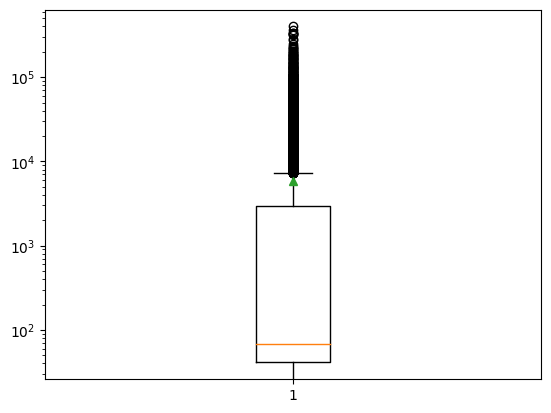

In [160]:
plt.boxplot(nonnull_users.statuses_count,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot shows that the mean is near the 90th percentile, so we find more reasonable to use the median value to replace the missing values for the `statuses_count` attribute.

In [161]:
user_ids_with_nonnull_statuses_count = df_users[df_users['statuses_count'].isnull() == False].id.astype(str).tolist()
tweets_by_user_ids_with_nonnull_statuses_count = df_tweets[df_tweets['user_id'].isin(user_ids_with_nonnull_statuses_count)]
tweets_counts_nonnull_statuses = tweets_by_user_ids_with_nonnull_statuses_count.groupby(['user_id']).count()['created_at']

In [162]:
values = nonnull_users.statuses_count.values - tweets_counts_nonnull_statuses.values
print(np.mean(values), np.median(values))

4697.048609235755 -42.0


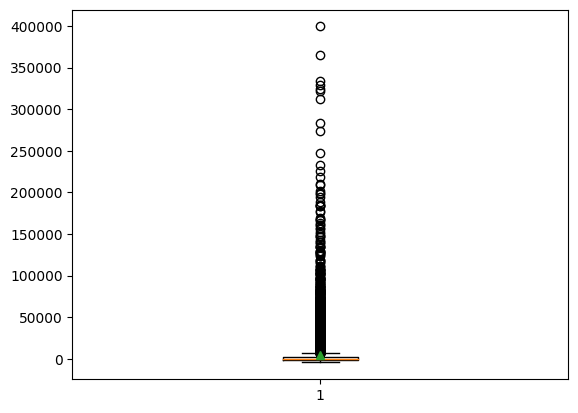

In [163]:
plt.boxplot(values,showmeans=True)
plt.show()

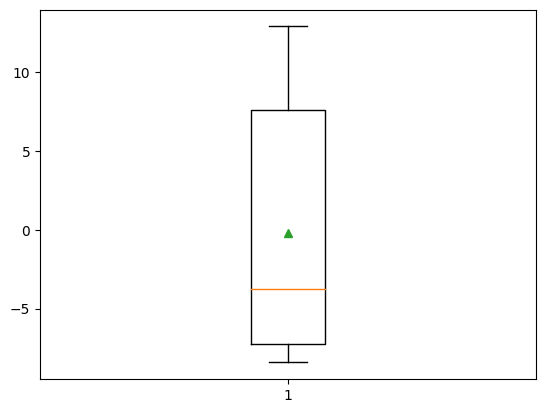

In [164]:
sign = np.sign(values)
log_values = np.log(np.where(np.abs(values)==0,1e-9, np.abs(values)))
plt.boxplot(sign*log_values,showmeans=True)
plt.show()

In [165]:
len(values) - np.count_nonzero(values)

20

0   id              11712595 non-null  object
  - MISSING VALUES: ??

1   user_id         11495314 non-null  object
  - MISSING VALUES: ??

2   retweet_count   11275463 non-null  object
  - MISSING VALUES:

3   reply_count     11064719 non-null  object
  - MISSING VALUES:

4   favorite_count  11065055 non-null  object
  - MISSING VALUES:
 
5   num_hashtags    10655073 non-null  object
  - MISSING VALUES:
 
6   num_urls        11063974 non-null  object
  - MISSING VALUES:
 
7   num_mentions    10858432 non-null  object
  - MISSING VALUES:
 
8   created_at      11712597 non-null  object
  - MISSING VALUES: no null values
 
9   text            11182415 non-null  object
  - MISSING VALUES:

In [166]:
df_users.statuses_count.fillna(median_statuses_count, inplace=True)

In [167]:
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11508 entries, 0 to 11507
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              11508 non-null  int64  
 1   name            11507 non-null  object 
 2   lang            11508 non-null  object 
 3   bot             11508 non-null  int64  
 4   created_at      11508 non-null  object 
 5   statuses_count  11508 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 539.6+ KB


In [171]:
df_users['created_at_conv'] = pd.to_datetime(df_users['created_at']).astype(np.int64)
df_users

,id,name,lang,bot,created_at,statuses_count,created_at_conv
0,2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0,1550858442000000000
1,2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0,1551150152000000000
2,137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0,1430377796000000000
3,466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0,1484707758000000000
4,2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0,1560886221000000000
...,...,...,...,...,...,...,...
11503,2911861962,Madrid Lae Maika .,en,0,2019-11-29 13:16:02,1126.0,1575033362000000000
11504,1378532629,Clau Sato,en,0,2018-04-27 03:01:58,3024.0,1524798118000000000
11505,126984069,ALMA LETICIA NUÑO,es,0,2015-03-29 17:01:24,6.0,1427648484000000000
11506,2383025796,Minnie Guadagno,en,1,2019-03-13 02:44:13,42.0,1552445053000000000


<AxesSubplot: >

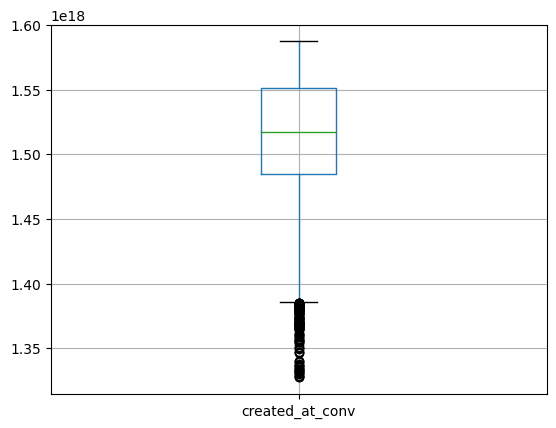

In [173]:
df_users.boxplot(['created_at_conv'])

In [174]:
df_users[df_users['created_at_conv'] < df_users['created_at_conv'].quantile(0.001)]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
875,755116,呉⚛,en,0,2012-02-08 05:25:49,39158.0,1328678749000000000
1501,3873101,تاتسو موناكاتا,en,0,2012-04-10 07:28:52,106335.0,1334042932000000000
1610,887281,Paul Youlten,en,0,2012-03-11 22:25:08,626.0,1331504708000000000
1966,785080,W H,en,0,2012-02-23 01:08:16,22496.0,1329959296000000000
3285,1813221,Morgan Johnson,en,0,2012-03-22 23:43:40,20225.0,1332459820000000000
3878,678033,Heather Gold,en,0,2012-01-24 01:57:38,45825.0,1327370258000000000
6261,1382561,jojoko,en,0,2012-03-18 23:24:35,8236.0,1332113075000000000
6983,2770511,べン,en,0,2012-03-30 02:31:13,38140.0,1333074673000000000
7192,806585,Christopher Mahan,en,0,2012-03-03 17:27:49,29997.0,1330795669000000000
10660,755746,Sarah Friedlander G.,en,0,2012-02-09 05:21:24,18035.0,1328764884000000000


In [175]:
df_users['bot'].value_counts()

1    6116
0    5392
Name: bot, dtype: int64

# Language field
There are some mispellings, so we are going to replace the mispelled ones to the correct ones, which are:
- en-gb to en-GB
- zh-tw to zh-TW

There are also two wrong values, 'Select Language...' and 'xx-lc', related to three users in total.
To understand the impact of the possible changes the number of tweets contained in the tweets file have been taken in account. The accounts seem to be active and have a lot of related tweets. The attribute is categorical so this value could be replaced by the mode which is the 'en' language. 
Since there are only three users, to double-check the validity of our choice the relative tweets have been analyzed. The check confirmed that 'en' is the right choice.

In [176]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [177]:
df_users['lang'].replace({'en-gb':'en-GB','zh-tw':'zh-TW'}, inplace=True)

In [178]:
df_users['lang'].value_counts()

en                    9970
it                     906
es                     319
pt                      65
en-GB                   54
ru                      42
fr                      36
ja                      33
zh-TW                   20
tr                      14
id                      12
ko                       9
de                       8
nl                       6
ar                       3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [179]:
df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')]

,id,name,lang,bot,created_at,statuses_count,created_at_conv
4166,2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0,1578182999000000000
8666,2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0,1574401486000000000
10065,29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0,1397079362000000000


In [181]:
ids = df_users[np.logical_or(df_users['lang'] == 'Select Language...', df_users['lang'] == 'xx-lc')].id.values.astype(str)
pd.set_option('display.max_rows',200)
df_tweets[df_tweets['user_id'].isin(ids[2:])]

,user_id,retweet_count,reply_count,favorite_count,num_hashtags,num_urls,num_mentions,created_at,text
6119,29552151,0,0,0,0,0,0,2019-07-23 17:32:30,"Spent the majority of my day drawing around, c..."
12218,29552151,0,0,0,0,0,0,2019-07-16 14:34:25,We all love dem cuddles. http://t.co/fPrcnUfacS
15946,29552151,0,0,0,0,0,0,2019-07-07 13:12:33,Dog sitting until 8 tonight. Again..
16947,29552151,0,NaN,0.0,NaN,0.0,NaN,2019-07-16 20:58:50,NaN
17457,29552151,NaN,0.0,NaN,0.0,0.0,0,2020-02-27 20:17:18,The chocolate is soooooooooooo amazing.
...,...,...,...,...,...,...,...,...,...
13633429,29552151,0,0,0,0,0,0,2019-07-27 12:25:15,@Cock_Penis Around 4 hopefully...Got to go to ...
13634576,29552151,0,0,0,0,0,0,2019-06-21 20:02:52,I'd love to have white hair for real though.
13637349,29552151,0,0,0,0,0,0,2020-02-06 11:33:15,Is there a way to wake up without feeling like...
13640124,29552151,0,0,0,0,0,0,2019-06-26 19:05:19,...and my nails are obviously being painted bl...


In [182]:
df_users['lang'].replace({'Select Language...':'en','xx-lc':'en'}, inplace=True)

In [183]:
df_users['lang'].value_counts()

en       9973
it        906
es        319
pt         65
en-GB      54
ru         42
fr         36
ja         33
zh-TW      20
tr         14
id         12
ko          9
de          8
nl          6
ar          3
da          2
en-AU       1
zh-cn       1
pl          1
el          1
fil         1
sv          1
Name: lang, dtype: int64

# Tweets csv cleaning

## id
In the id column there are only two missing values. Since the column is not meaningful for the analysis phase, the column is dropped.

## user_id 
In the user_id column there are a lot of missing values, wrong values (non numerical ids) and 210778 user ids do not have any correspondance with users file. Nevertheless, these records have been kept because the other columns could be useful for future analyses.

## retweet_count


In [144]:
df_tweets_single.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column          Non-Null Count     Dtype 
---  ------          --------------     ----- 
 0   id              11712346 non-null  object
 1   user_id         11495314 non-null  object
 2   retweet_count   11275326 non-null  object
 3   reply_count     11064671 non-null  object
 4   favorite_count  11064981 non-null  object
 5   num_hashtags    10655073 non-null  object
 6   num_urls        11063920 non-null  object
 7   num_mentions    10858432 non-null  object
 8   created_at      11712348 non-null  object
 9   text            11182415 non-null  object
dtypes: object(10)
memory usage: 982.9+ MB


C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\3297118476.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df_tweets_single.info(null_counts=True)


In [205]:
df_tweets_single.drop(columns=['id'], inplace=True)

KeyError: "['id'] not found in axis"

In [206]:
df_tweets_single[np.logical_and(df_tweets['user_id'].isnull(), df_tweets['text'].isnull())].info()

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\1487214206.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_tweets_single[np.logical_and(df_tweets['user_id'].isnull(), df_tweets['text'].isnull())].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 56118 entries, 42 to 13664257
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         0 non-null      object
 1   retweet_count   51567 non-null  object
 2   reply_count     25737 non-null  object
 3   favorite_count  50960 non-null  object
 4   num_hashtags    392 non-null    object
 5   num_urls        26107 non-null  object
 6   num_mentions    466 non-null    object
 7   created_at      56118 non-null  object
 8   text            0 non-null      object
dtypes: object(9)
memory usage: 4.3+ MB


In [207]:
df_users.id = df_users.id.astype(str)
merged = df_tweets_single.merge(df_users, left_on='user_id', right_on='id', how='left')


In [211]:
df_tweets_single.shape

(11712348, 9)

In [212]:
merged.shape

(11712348, 16)

In [213]:
len(merged[merged['id'].isnull()].user_id.unique())

210778

This is the number of `user_id` that have no correspondance in users file.

In [240]:
def to_float(x):
    try:
        return float(x)
    except:
        return -1.0
    
df_tweets_single['retweet_count_conv'] = df_tweets_single.retweet_count.apply(to_float)

In [241]:
df_tweets_single.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11712348 entries, 0 to 13664695
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   retweet_count       object 
 2   reply_count         object 
 3   favorite_count      object 
 4   num_hashtags        object 
 5   num_urls            object 
 6   num_mentions        object 
 7   created_at          object 
 8   text                object 
 9   retweet_count_conv  float64
dtypes: float64(1), object(9)
memory usage: 982.9+ MB


In [250]:
droppe = df_tweets_single[np.logical_and(df_tweets_single['retweet_count_conv'] != -1.0, df_tweets_single['retweet_count_conv'] < 1e30)]

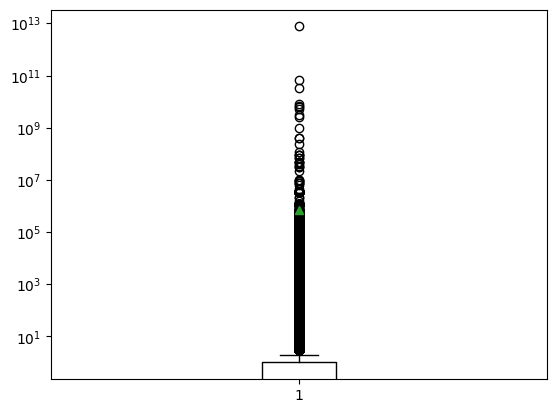

In [251]:
plt.boxplot(droppe.retweet_count_conv,showmeans=True)
plt.yscale('log')
plt.show()

The boxplot is not informative, so we investigate this field by means of an histogram.

C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\231108325.py:3: RuntimeWarning: divide by zero encountered in log
  droppe['retweet_count_log'] = np.log(droppe.retweet_count_conv.values)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\231108325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppe['retweet_count_log'] = np.log(droppe.retweet_count_conv.values)
C:\Users\Alessandro\AppData\Local\Temp\ipykernel_13332\231108325.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppe['retwe

array([[<AxesSubplot: title={'center': 'retweet_count_log'}>]],
      dtype=object)

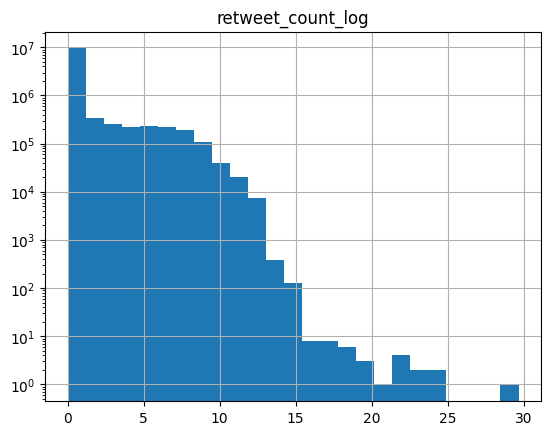

In [277]:
import math

droppe['retweet_count_log'] = np.log(droppe.retweet_count_conv.values)
droppe['retweet_count_log'] = droppe.retwee_count_log.replace(-np.inf, 0)
n_bins = math.ceil(np.log2(len(droppe['retweet_count_log'])) + 1) #Sturges' rule
droppe.hist('retweet_count_log', bins=n_bins, log=True)

In [282]:
print("mean: " + str(np.mean(droppe.retweet_count_conv.values)))
print("median: " + str(np.median(droppe.retweet_count_conv.values)))

mean: 697926.974898063
median: 0.0


As it is possible to see the distribution is positively skewed. Considering the statistical indicators, it is clear that the mean is too much influenced by outliers so the median has been taken in account.

In [ ]:
df_appoggio = df_tweets_single['retweet_count_conv'].replace({-1.0: 0})
df_appoggio.info()
#df_appoggio[df_appoggio['retweet_count_conv'] < 0].value_counts()

## TODO understand why there are NaN numbers in retweet_count_conv and replace all the wrong values